In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
''' data:
Here are some factors that affects medical cost charges:

1.Age: Age in years

2.Sex: Male or Female

3.BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4.Children: Number of children covered by health insurance

5.Smoker: Whether smoker or not

6.Region: Which US region - NW, NE, SW, SE

7.Charges: annual Insurance charges in USD
'''

' data:\nHere are some factors that affects medical cost charges:\n\n1.Age: Age in years\n\n2.Sex: Male or Female\n\n3.BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9\n\n4.Children: Number of children covered by health insurance\n\n5.Smoker: Whether smoker or not\n\n6.Region: Which US region - NW, NE, SW, SE\n\n7.Charges: annual Insurance charges in USD\n'

In [3]:
'''
The file holds all the data we’ll be working with.
'''

file = pd.read_csv(r"C:\Users\SunByte\Desktop\desktab\ML\ML codes\linear_regresion\data\Medical-Insurance.csv")
#print(file)
#print(file.head())
#print(file.describe())
#print(file.shape)


In [4]:
'''
We replace any "?" in the dataset with the average value for that feature. This isn’t the best approach for categorical data like male/female or yes/no, but it keeps the dataset’s average unchanged for now.
'''

for col in file.columns:
    file[col] = pd.to_numeric(file[col], errors="coerce")  # "?" -> NaN
    mean_val = file[col].mean(skipna=True)
    file[col] = file[col].fillna(mean_val)

In [5]:
'''
We divide the data into training and testing sets. We use pandas here because it handles data allocation better than standard Python lists.
'''

# Training split
x_train_raw = file.iloc[:1800, :-1]   # all rows 0..1799, all columns except last
y_train_raw = file.iloc[:1800, -1]    # all rows 0..1799, last column only

# Test split
x_test_raw  = file.iloc[1800:, :-1]   # rows 1800..end, all columns except last
y_test_raw  = file.iloc[1800:, -1]    # rows 1800..end, last column only

'''Explanation

file.iloc[:1800, :-1] → select rows 0 → 1799, columns from 0 up to (but not including) the last one.

file.iloc[:1800, -1] → select rows 0 → 1799, only the last column.'''

# print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)
# print(x_train_raw[0])

'Explanation\n\nfile.iloc[:1800, :-1] → select rows 0 → 1799, columns from 0 up to (but not including) the last one.\n\nfile.iloc[:1800, -1] → select rows 0 → 1799, only the last column.'

In [6]:
'''
We turn the pandas DataFrame into a list of lists for easier processing later on.
'''

# Training split (convert to lists)
x_train_raw = file.iloc[:1800, :-1].values.tolist()   # list of lists
y_train_raw = file.iloc[:1800, -1].values.tolist()    # list

# Test split (also convert to lists if needed)
x_test_raw  = file.iloc[1800:, :-1].values.tolist()
y_test_raw  = file.iloc[1800:, -1].values.tolist()

# print(x_train_raw[0])

In [7]:
'''
We scale all the data to fit within a 0-to-1 range for consistency.
'''

# Assume x_train_raw is a list of lists (rows of features)
# Assume y_train_raw is a list of numbers (labels)

# Normalize features (x_train)
x_train = []
for j in range(len(x_train_raw[0])):  # for each column
    col = [row[j] for row in x_train_raw]  # extract column
    min_val, max_val = min(col), max(col)

    # avoid divide by zero if all values are the same
    if max_val == min_val:
        norm_col = [0.0 for _ in col]
    else:
        norm_col = [(val - min_val) / (max_val - min_val) for val in col]

    # insert normalized column back
    if j == 0:
        for i in range(len(norm_col)):
            x_train.append([norm_col[i]])
    else:
        for i in range(len(norm_col)):
            x_train[i].append(norm_col[i])

# Normalize target (y_train)
min_y, max_y = min(y_train_raw), max(y_train_raw)
if max_y == min_y:
    y_train = [0.0 for _ in y_train_raw]
else:
    y_train = [(val - min_y) / (max_y - min_y) for val in y_train_raw]

# Normalize features (x_test)
x_test = []
for j in range(len(x_test_raw[0])):  # for each column
    col = [row[j] for row in x_test_raw]  # extract column
    min_val, max_val = min(col), max(col)

    # avoid divide by zero if all values are the same
    if max_val == min_val:
        norm_col = [0.0 for _ in col]
    else:
        norm_col = [(val - min_val) / (max_val - min_val) for val in col]

    # insert normalized column back
    if j == 0:
        for i in range(len(norm_col)):
            x_test.append([norm_col[i]])
    else:
        for i in range(len(norm_col)):
            x_test[i].append(norm_col[i])

# Normalize target (y_train)
min_y, max_y = min(y_test_raw), max(y_test_raw)
if max_y == min_y:
    y_test = [0.0 for _ in y_test_raw]
else:
    y_test = [(val - min_y) / (max_y - min_y) for val in y_test_raw]



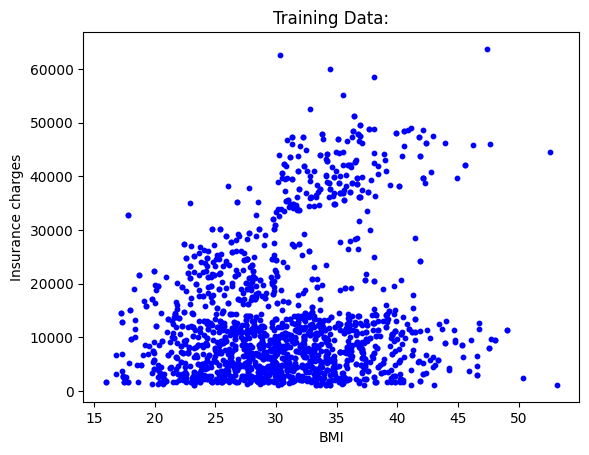

In [8]:
'''
This part just creates a scatter plot of the data.
'''

x_vals = file.iloc[:1800, 2]   # column 2 = third feature
y_vals = file.iloc[:1800, -1]  # last column = target

plt.scatter(x_vals, y_vals, color="blue", s=10)
plt.xlabel("BMI")
plt.ylabel("Insurance charges")
plt.title("Training Data:")
plt.show()

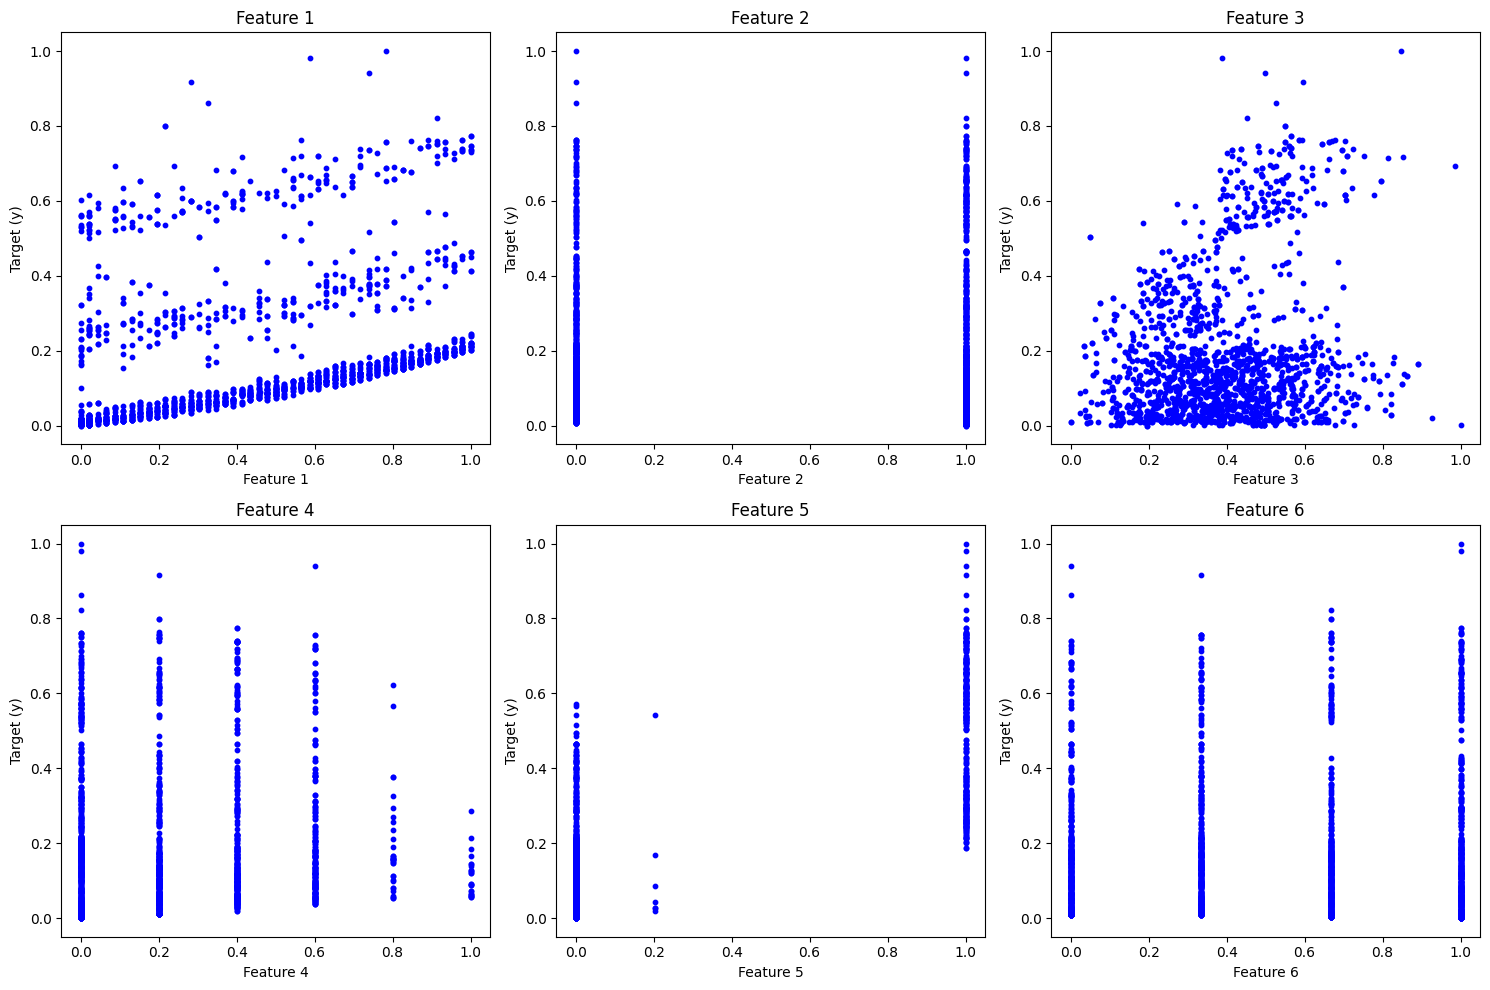

In [9]:
'''
We make scatter plots for each feature against the target variable.
'''

# assuming x_train and y_train are pandas DataFrames/Series
# if they are lists, you can skip .iloc and use indexing directly

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 cols
axes = axes.ravel()  # flatten to 1D array for easy looping

for i in range(6):  # 6 features
    x_vals = [row[i] for row in x_train] if isinstance(x_train, list) else x_train.iloc[:, i]
    y_vals = y_train
    axes[i].scatter(x_vals, y_vals, s=10, color="blue")
    axes[i].set_xlabel(f"Feature {i+1}")
    axes[i].set_ylabel("Target (y)")
    axes[i].set_title(f"Feature {i+1}")

plt.tight_layout()
plt.show()

In [10]:
'''
We scatter the data and plot a function both on one diagram.
'''

def plot_regression(x_train, y_train, w):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()  # flatten grid for easy loop

    for i in range(6):  # 6 features

        # pick one feature column
        x_vals = [row[i] for row in x_train] if isinstance(x_train, list) else x_train.iloc[:, i]
        y_vals = y_train
        axes[i].scatter(x_vals, y_vals, s=5, color="blue")

        # regression line (only vary feature i, keep others = 0)
        min_x, max_x = min(x_vals), max(x_vals)
        line_x = [min_x, max_x]
        line_y = [w[i] * xi for xi in line_x]  # only weight i

        axes[i].plot(line_x, line_y, color="red", label="Regression Line")

        axes[i].set_xlabel(f"Feature {i+1}")
        axes[i].set_ylabel("Target (y)")
        axes[i].set_title(f"Feature {i+1}")
        axes[i].legend()

    plt.tight_layout()
    plt.show()

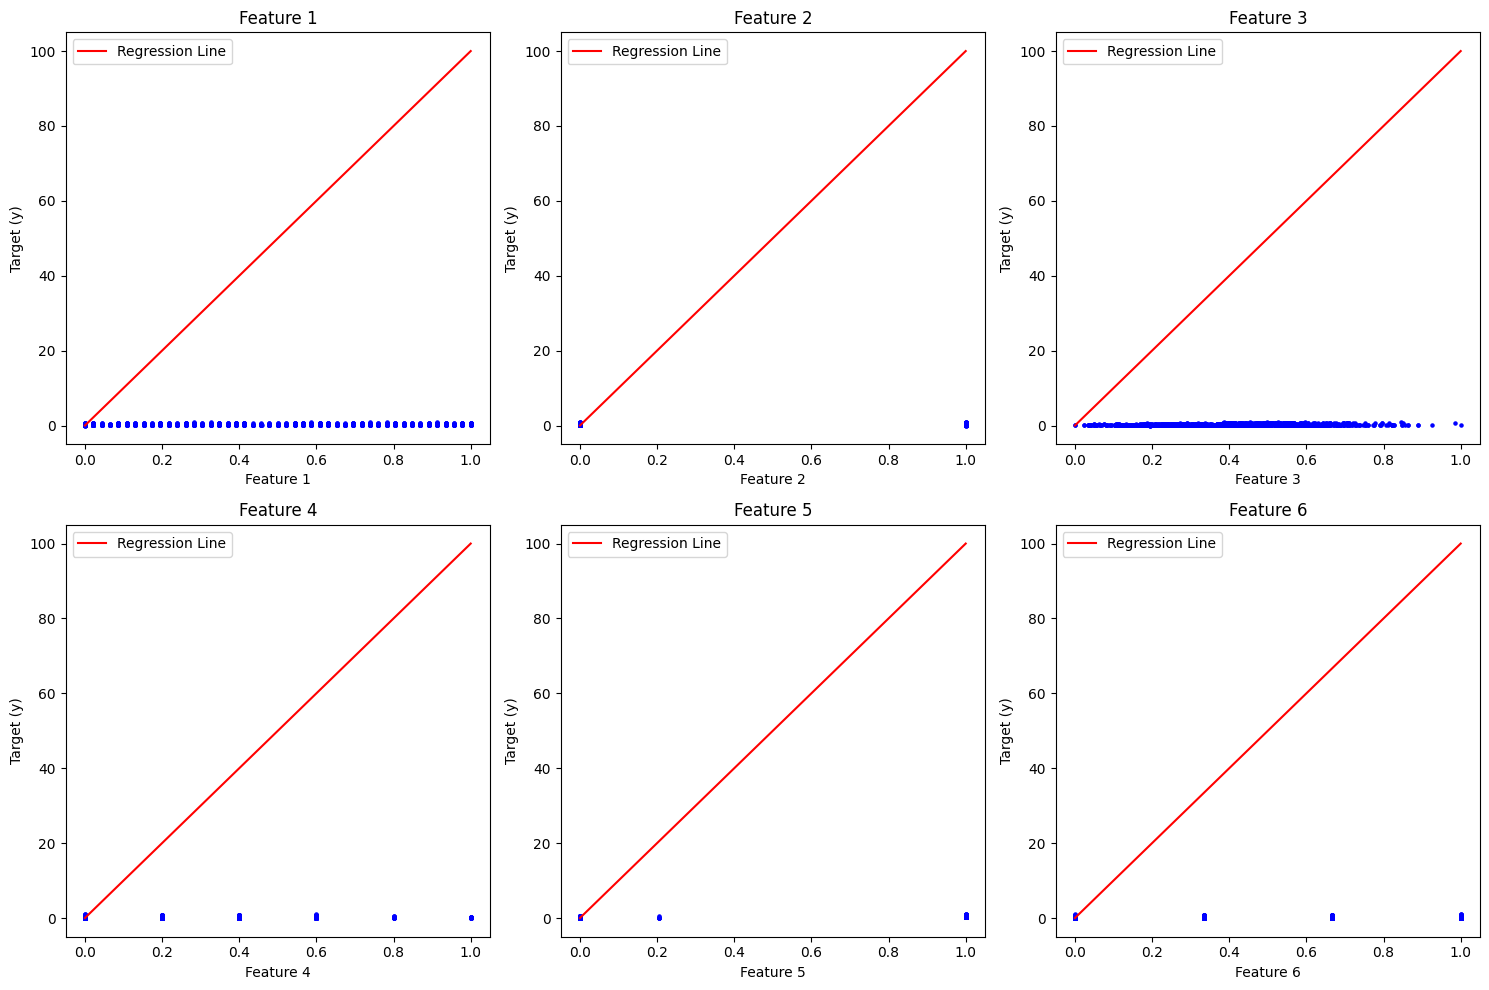

In [11]:
'''
This cell checks the plot_regression function by drawing the regression line for each feature.
The values are just for testing and can be changed
'''

test_value_plot_regression = [100,100,100,100,100,100]
plot_regression(x_train, y_train, test_value_plot_regression)

In [12]:
'''
This function computes the MSE, which measures how far off our predictions are. It’s used later for gradient descent.
'''

def mat_mul(w, x):
    output = 0
    for i in range(len(w)):
        output += w[i] * x[i]
    return output

def mse(w, input_x, input_y):       #input_x is x_train and input_y is y_train
    sum_mse = 0
    for i in range(len(input_x)):
        x_with_bias = [1] + list(input_x[i])  # add bias
        sum_mse += (input_y[i] - mat_mul(w, x_with_bias))**2
    return sum_mse / (2 * len(input_x))  # standard 1/2m MSE


In [13]:
'''
The gd function applies gradient descent to optimize the model’s weights.
'''

def gd(w, alpha, x_train, y_train):
    w_new = [0] * len(w)
    sum_gd = [0] * len(w)

    for i in range(len(x_train)):
        x_with_bias = [1] + list(x_train[i])
        error = mat_mul(w, x_with_bias) - y_train[i]  # <-- FIX SIGN

        for j in range(len(w)):
            sum_gd[j] += error * x_with_bias[j]

    for j in range(len(w)):
        sum_gd[j] /= len(x_train)
        w_new[j] = w[j] - alpha * sum_gd[j]

    # print(sum_gd)
    # print("\n")
    return w_new

In [14]:
'''
This loop runs the gradient descent to find the best weights for our model.
'''

w = [5000] * (len(x_train[0]) + 1)   #base W
alpha = 0.01
input = [0] * len(w)        #input
epoch = 50000

for i in range(epoch):
    w = gd(w, alpha, x_train, y_train)
    # print(f"Iter {i}, MSE: {mse(w)}, w: {w}")
    # print (w)
    if i % (epoch/10) == 0 or i == epoch:     # This part only prints out 11 iterations of w for debugging
        print(f"Iter {i}, MSE: {mse(w, x_train, y_train)}")
        # print(w)

Iter 0, MSE: 141078304.489013
Iter 5000, MSE: 10673.352754167516
Iter 10000, MSE: 971.6300368469433
Iter 15000, MSE: 107.36100381436307
Iter 20000, MSE: 11.969252368881413
Iter 25000, MSE: 1.3385484555571945
Iter 30000, MSE: 0.15337332243096682
Iter 35000, MSE: 0.021240759301015065
Iter 40000, MSE: 0.006509581774090245
Iter 45000, MSE: 0.00486723418223223


[-0.06615054300098659, 0.18952283267633277, 0.0024177616132235054, 0.23975428511765368, 0.03837448754170696, 0.38160249125025486, -0.01969594673574716]


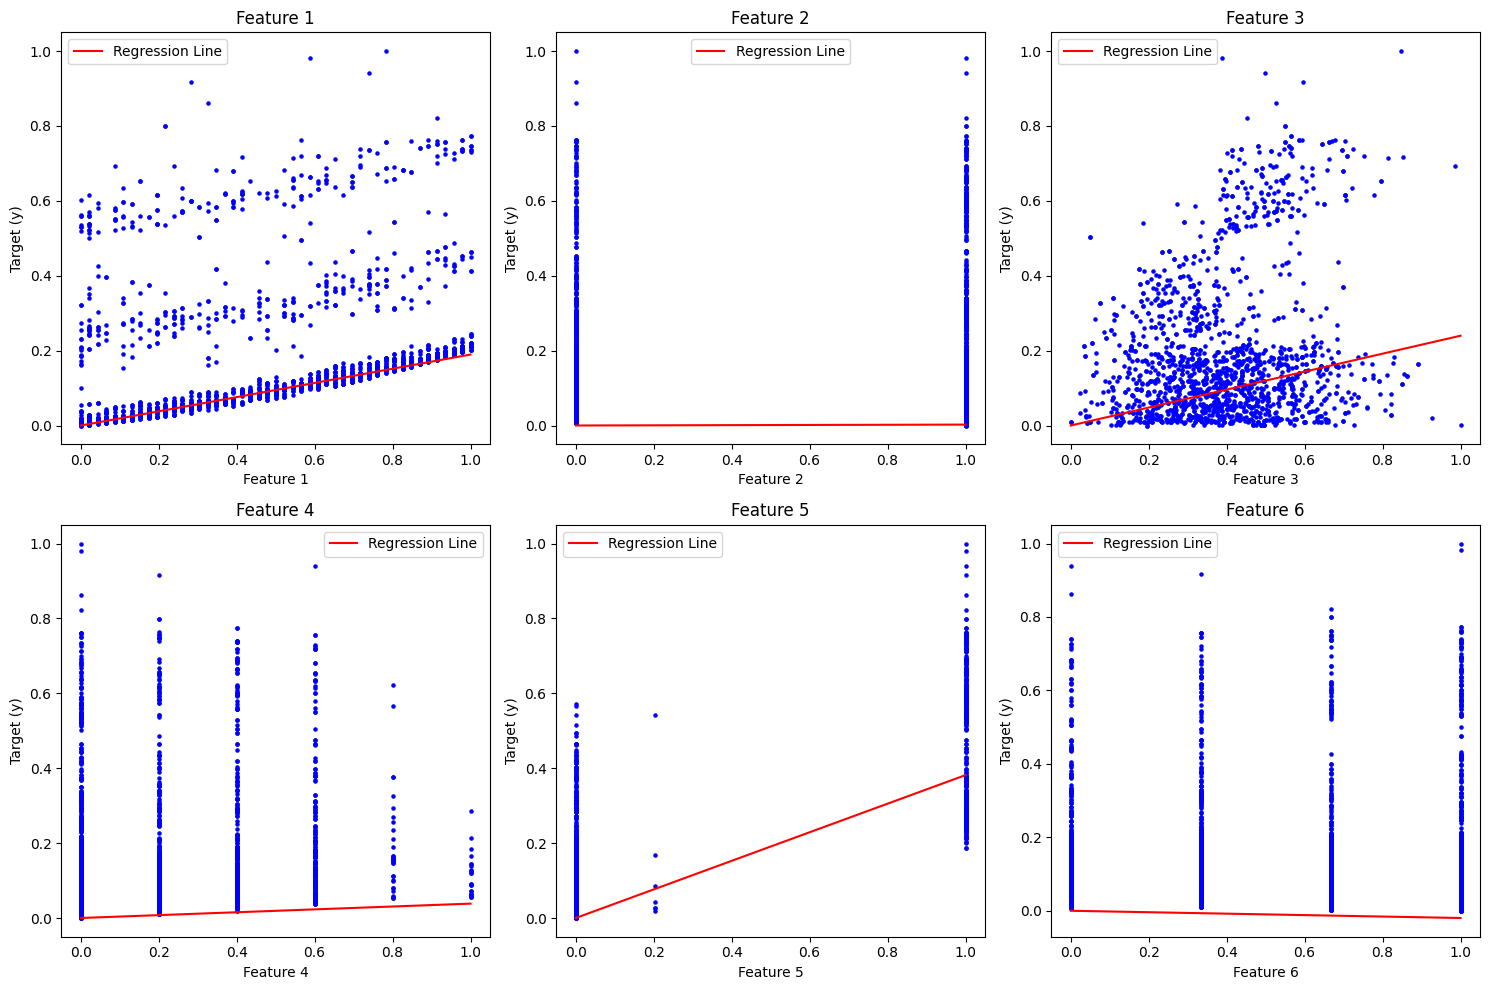

In [15]:
print(w)
plot_regression(x_train, y_train, w[1::1])

In [16]:
'''
We test the model on the test set to see how well it’s performing and if it’s converging.
'''

# Predict function using your mat_mul
def predict(x, w):
    x_with_bias = [1] + list(x)  # add bias
    return mat_mul(w, x_with_bias)

# Evaluate function using your mse
def evaluate(input_x, input_y, w):
    mse_val = mse(w, input_x, input_y)   # use your mse function
    predictions = [predict(x, w) for x in input_x]
    return mse_val, predictions

# Test on training set
train_mse, train_predictions = evaluate(x_train, y_train, w)

# First 10 predictions
print("Train MSE:", train_mse)
print("First 10 predictions vs actual:")
for i in range(10):
    print(f"Pred: {train_predictions[i]:.2f}, Actual: {y_train[i]:.2f}")

In [17]:
'''
Comparing real data with predicted data and at the end we find the MSE of the test data.
'''

sum = 0
for i in range(len(x_test)):
    # print("predicted value:", mat_mul(x_test[i], w[1::1]) + w[0], "vs actual value: ", y_test[i])
    sum += (mat_mul(x_test[i], w[1::1]) + w[0] - y_test[i])**2

print(sum / len(x_test)*2)

0.019176965323320333


In [19]:
# --- Denormalize y_test and predictions ---

# Predict on test set (still normalized)
y_test_pred = [mat_mul(x, w[1:]) + w[0] for x in x_test]

# Denormalize both actual and predicted values
y_test_denorm = [val * (max_y - min_y) + min_y for val in y_test]
y_test_pred_denorm = [val * (max_y - min_y) + min_y for val in y_test_pred]

In [22]:
# First 10 predictions
print("First 10 test predictions vs actual:")
for pred, actual in zip(y_test_pred_denorm[:10], y_test_denorm[:10]):
    print(f"Pred: {pred:.2f}, Actual: {actual:.2f}")

First 10 test predictions vs actual:
Pred: 10463.65, Actual: 7345.73
Pred: 11820.38, Actual: 9140.95
Pred: 28062.33, Actual: 18608.26
Pred: 17491.46, Actual: 14418.28
Pred: 36704.05, Actual: 28950.47
Pred: 38733.62, Actual: 46889.26
Pred: 38778.22, Actual: 46599.11
Pred: 33385.24, Actual: 39125.33
Pred: 4222.09, Actual: 2727.40
Pred: 10547.79, Actual: 8968.33


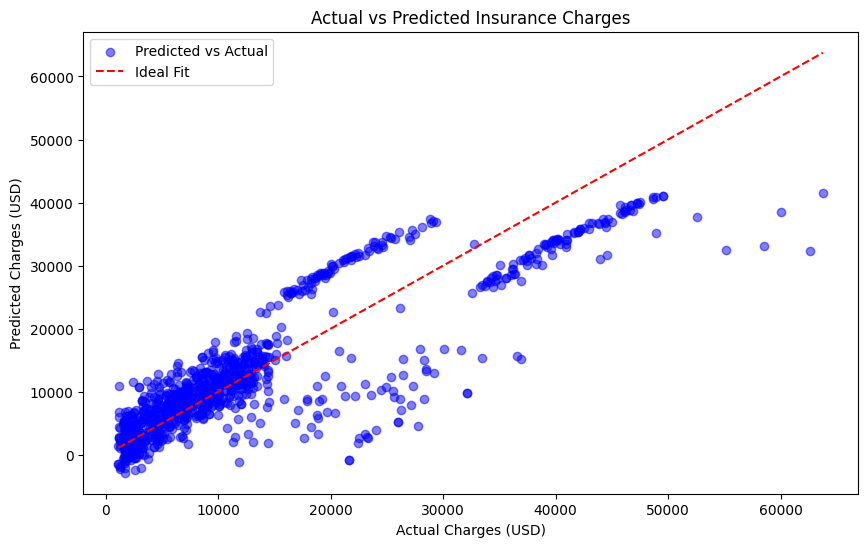

In [20]:
# --- Visualization: Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test_denorm, y_test_pred_denorm, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test_denorm), max(y_test_denorm)],
         [min(y_test_denorm), max(y_test_denorm)], 'r--', label="Ideal Fit")

plt.xlabel("Actual Charges (USD)")
plt.ylabel("Predicted Charges (USD)")
plt.title("Actual vs Predicted Insurance Charges")
plt.legend()
plt.show()